In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *


ValueError: math domain error

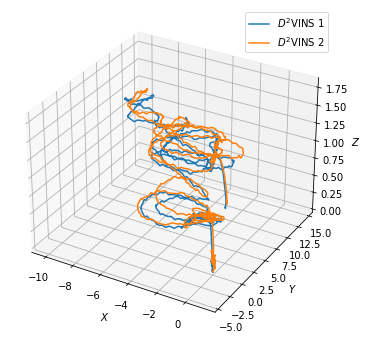

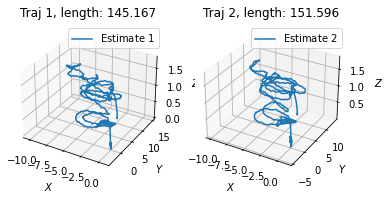

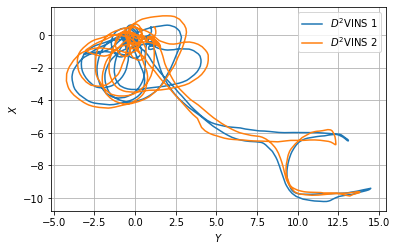

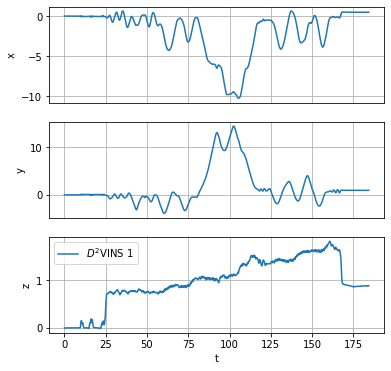

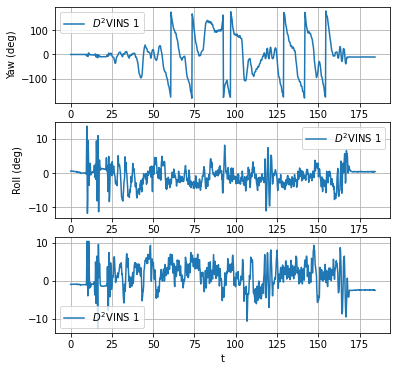

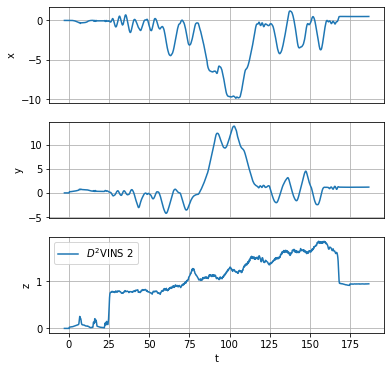

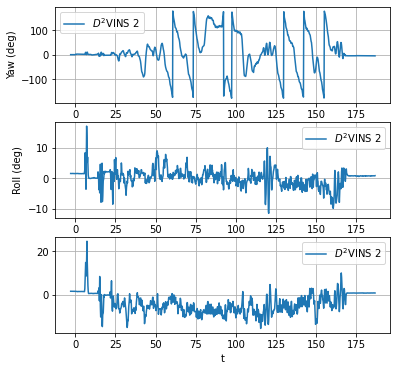

In [4]:
traj_vo1, t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/handhold/handhold1-2/d2vins_1.csv")
traj_vo2, _ = read_path_from_csv(f"/home/xuhao/data/d2slam/handhold/handhold2-2/d2vins_2.csv", t0=t0)
# traj_pgo1, t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/handhold/handhold1-2/pgo_1.csv")
# traj_pgo2, _ = read_path_from_csv(f"/home/xuhao/data/d2slam/handhold/handhold2-2/pgo_2.csv", t0=t0)

trajs_vo = {
    1: traj_vo1,
    2: traj_vo2,
}

# trajs_pgo = {
#     1: traj_pgo1,
#     2: traj_pgo2,
# }

nodes = [1, 2]
plot_fused(nodes, trajs_vo)
# plot_fused_err(nodes, trajs_vo, trajs_pgo)
plot_relative_pose_err(1, [2], trajs_vo, trajs_vo, common_time_dt=0.3)

In [26]:
# Extract compuation time from log.
# First is the trackRemoteFrames
# Sample log: 
# [D2FeatureTracker::trackRemoteFrames] frame 1000002, matched 168, time 2.88ms
import re

def extract_trackRemoteFrames_from_log(log_content):
    # Sample log: 
    # [D2FeatureTracker::trackRemoteFrames] frame 1000002, matched 168, time 2.88ms
    # Match using regex
    pattern = re.compile(r"\[D2FeatureTracker::trackRemoteFrames\] frame \d+, matched \d+, time (\d+\.\d+)ms")
    matched = pattern.findall(log_content)
    matched = np.array(matched, dtype=float)
    return np.mean(matched)
    
def extract_trackLocal_from_log(log_content):
    # Sample log: 
    # [D2FeatureTracker] frame_id: 2000072, landmark_num: 400, time_cost: 3.0ms
    # Match using regex
    pattern = re.compile(r"\[D2FeatureTracker\] frame_id: \d+, landmark_num: \d+, time_cost: (\d+\.\d+)ms")
    matched = pattern.findall(log_content)
    matched = np.array(matched, dtype=float)
    return np.mean(matched)

def extract_LoopCam_from_log(log_content):
    # Sample log: 
    # [D2LoopCam] [D2Frontend::LoopCam] KF Count 2574 loop_cam cost avg 41.7ms cur 49.5ms
    # Match using regex, to match current loop_cam time
    pattern = re.compile(r"\[D2Frontend::LoopCam\] KF Count \d+ loop_cam cost avg \d+\.\d+ms cur (\d+\.\d+)ms")
    matched = pattern.findall(log_content)
    matched = np.array(matched, dtype=float)
    return np.mean(matched)

def extract_Margin_from_log(log_content):
    # Sample log: 
    # [D2VINS::marginalize] time cost 83.6ms frame_id 1000079 total_eff_state_dim: 239 keep_size 118 remove size 121 eff_residual_size: 5289 keep_block_size 20 
    # Match using regex, to match time cost
    pattern = re.compile(r"\[D2VINS::marginalize\] time cost (\d+\.\d+)ms frame_id \d+ total_eff_state_dim: \d+ keep_size \d+ remove size \d+ eff_residual_size: \d+ keep_block_size \d+")
    matched = pattern.findall(log_content)
    matched = np.array(matched, dtype=float)
    return np.mean(matched)

def extract_optimization_time_from_log(log_content):
    # Sample log: 
    # [D2VINS::solveDist@2](532) odom Pose T [+0.004,+0.215,+0.075] YPR [-4.1,+3.9,+0.8] Vel -0.00 0.25 0.45@ref1 landmarks 100/100 drone_num 2 opti_time 62.6ms steps 3 td 1.0ms 
    # Match using regex, to match opti_time
    pattern = re.compile(r"\[D2VINS::solveDist@2\]\(\d+\) odom Pose T \[\+0\.\d+,\+0\.\d+,\+0\.\d+\] YPR \[-\d+\.\d+,\+\d+\.\d+,\+\d+\.\d+\] Vel -?\d+\.\d+ \d+\.\d+ \d+\.\d+@ref\d+ landmarks \d+/\d+ drone_num \d+ opti_time (\d+\.\d+)ms steps \d+ td \d+\.\d+ms")
    matched = pattern.findall(log_content)
    matched = np.array(matched, dtype=float)
    return np.mean(matched)
        
def extract_comm_delay_from_log(log_content):
    # Sample log:
    # [LoopNet]ImageDescriptorHeader 1000108c0 from D1 delay 1.7ms msg_id -1970633955: feature num 155 gdesc 1024:0
    # Match using regex, to match delay
    pattern = re.compile(r"\[LoopNet\]ImageDescriptorHeader \d+c\d from D\d+ delay (\d+\.\d+)ms msg_id -?\d+: feature num \d+ gdesc \d+:\d+")
    matched = pattern.findall(log_content)
    matched = np.array(matched, dtype=float)
    return np.mean(matched)

#Read log as string
log_vo = "/home/xuhao/data/d2slam/handhold/handhold2-3/log_vo.txt"

with open("/home/xuhao/data/d2slam/handhold/handhold2-3/log_vo.txt", "r") as f:
    log_content = f.read()
    track_remote_time = extract_trackRemoteFrames_from_log(log_content)
    print(f"Averaged trackRemoteFrames time: {track_remote_time:.2f}ms")
    track_local_time = extract_trackLocal_from_log(log_content)
    print(f"Averaged trackLocal time: {track_local_time:.2f}ms")
    loop_cam_time = extract_LoopCam_from_log(log_content)
    print(f"Averaged LoopCam time: {loop_cam_time:.2f}ms")
    margin_time = extract_Margin_from_log(log_content)
    print(f"Averaged marginalization time: {margin_time:.2f}ms")
    opti_time = extract_optimization_time_from_log(log_content)
    print(f"Averaged optimization time: {opti_time:.2f}ms")
    comm_delay = extract_comm_delay_from_log(log_content)
    print(f"Averaged communication delay: {comm_delay:.2f}ms")


Averaged trackRemoteFrames time: 1.64ms
Averaged trackLocal time: 2.67ms
Averaged LoopCam time: 41.70ms
Averaged marginalization time: 16.88ms
Averaged optimization time: 56.23ms
Averaged communication delay: 23.89ms
